In [ ]:
import folium
import pyproj
import pandas as pd
# Transformation SJTSK a WGS

# Remove this with you path and headers
jtsk = pd.read_csv('/content/1_Liberec-JTSK.xyz', sep = '\t', names = ['ID','X','Y','Z'])
jtsk.head()

src_proj = pyproj.CRS('EPSG:5514')  # S-JTSK Krovak
tgt_proj = pyproj.CRS('EPSG:4326')  # WGS 84

# Create a transformer object
transformer = pyproj.Transformer.from_crs(src_proj, tgt_proj, always_xy=True)

df = jtsk

# Transform the coordinates
transformed_coords = df.apply(lambda row: transformer.transform(row['X'], row['Y']), axis=1)
df[['Longitude', 'Latitude']] = pd.DataFrame(transformed_coords.tolist(), index=df.index)

# Check the first three transformed points
print(df[['X', 'Y', 'Latitude', 'Longitude']].head(3))

# Plot the first three points on a Folium map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

satellite_layer = folium.TileLayer('https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
                                   attr='Map data: &copy; <a href="https://www.opentopomap.org">OpenTopoMap</a> contributors',
                                   name='Satellite',
                                   control=True)
satellite_layer.add_to(m)

# Add points to the map
for idx, row in df.iterrows():
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        radius=1,  # Radius in meters
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"Point {idx+1}: ({row['Latitude']}, {row['Longitude']})"
    ).add_to(m)

# Add layer control to toggle between base maps
folium.LayerControl().add_to(m)

# Display the map
m

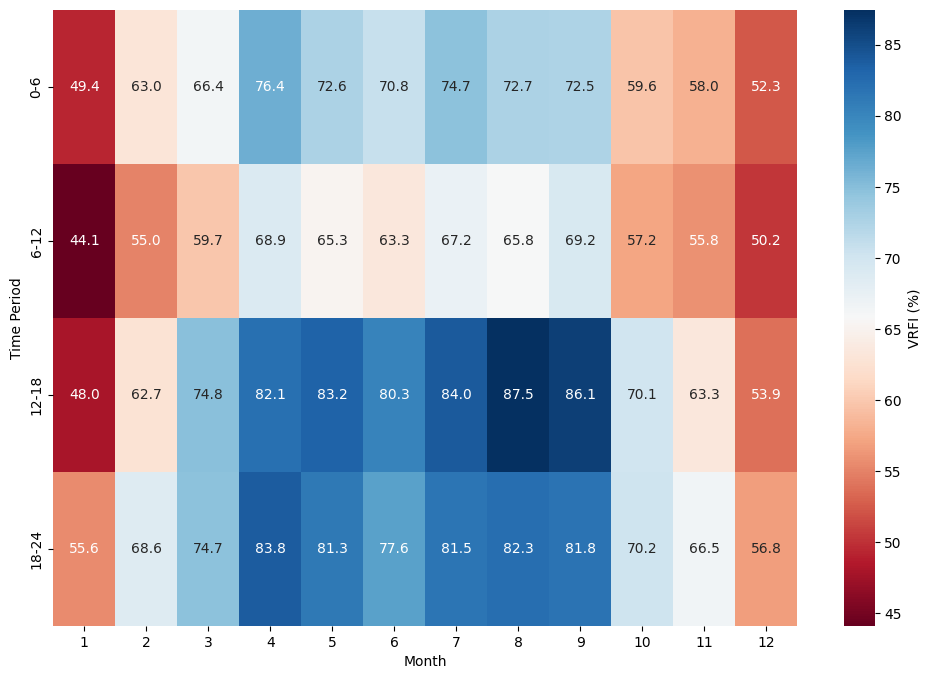